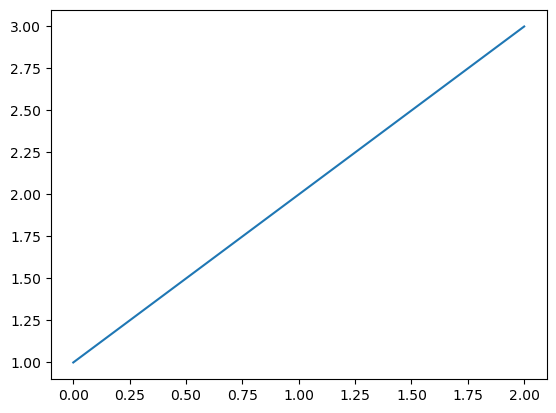

In [1]:
import matplotlib.pyplot as plt

plt.plot([1,2,3])

In [2]:
import torch
from torch.utils.data import Dataset
from pathlib import Path
import os
from torchvision import io
import pickle
import sys
import numpy as np

In [11]:
# sys.path.append("../utilities")

In [4]:
# import DataReader

In [3]:
class BaseHISDataset(Dataset):
    def __init__(self, 
                 images_dir: str,
                 annotations_dir: str):
        """Base loader for hierarchical dataset

        Args:
            images_dir (str): path to source images folder
            annotations_dir (str): path to annotation tree folder            
        """
        super().__init__()
        self.images_dir = images_dir
        self.annotations_dir = annotations_dir
        self.images = os.listdir(images_dir)
        
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, index):
        # read image
        image = io.read_image(str(Path(self.images_dir) / self.images[index]))
        
        # read annotations
        with open(str(Path(self.annotations_dir) /
                  self.images[index].replace(".png", ".pkl")), "rb") as f:
            annotation = pickle.load(f)
            

        return image, annotation

In [4]:
dl = BaseHISDataset("../data/dataset_3/data/", "../data/dataset_3/treeAnnotations/")

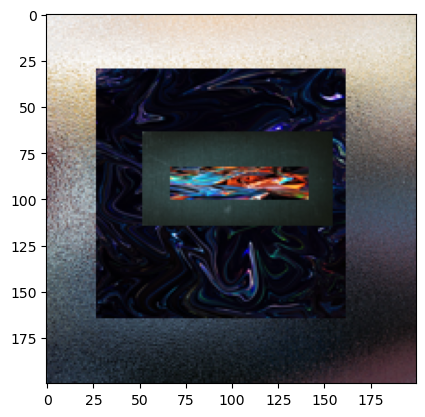

In [5]:
plt.imshow(dl[0][0].permute(1,2,0))

In [ ]:
# make masks int not float, or even bool is ok